# Исследование продаж видеоигр

Для исследования предоставлены исторические данные о продажах игр, которые содержат информацию о жанрах, платформах, а также об оценках пользователей и экспертов.

Цель исследования: определить наиболее потенциально популярные платформы и выявить предпочтения пользователей в зависимости от регионов для планирования продаж и рекламной компании интернет-магазина на 2017 год.

Согласно документации:
- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы

1. [Изучение данных](#1)  

2. [Предобработка данных](#2)

    2.1 [Стиль заголовков](#2.1)

    2.2 [Обрабока пропусков](#2.2)

    2.3 [Замена типа даных](#2.3)

    2.4 [Проверка данных и добавление расчётов](#2.4)

3. [Исследовательский анализ данных](#3)

    3.1 [Динамика продаж по годам и платформам](#3.1)

    3.2 [Оценка влияния отзывов и жанров на продажи](#3.2)

4. [Оценка данных по регионам](#4)

    4.1 [Топ-5 популярных платформ](#4.1)

    4.2 [Топ-5 популярных жанров](#4.2)

    4.3 [Влияние рейтинга ESRB на продажи по регионам](#4.3)

5. [Проверка гипотез](#5)

    5.1 [Сравнение средних пользовательских рейтингов платформ Xbox One и PC](#5.1)

    5.2 [Сравнение средних пользовательских рейтингов жанров action и sports](#5.2)

6. [Общие выводы](#6)

<a name="1"><h2>1 Изучение данных</h2></a>

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import matplotlib
matplotlib.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'

Прочитаем файл и сохраним в переменной 'df':

In [2]:
df = pd.read_csv('/content/games.csv')

Выведем на экран первые 10 строк и просмотрим общую информацию о таблице:

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. В каждой строке таблицы данные, которые содержат информацию о компьютерных играх, всего 16715 записей.


Подсчитаем количество пропусков:

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div style="border: solid green 2px; padding: 20px">

**Выводы**
    
* Названия столбцов следует привести к нижнему регистру, так как они записаны с использованием прописных букв.
* Столбец с годом выпуска 'Year_of_Release' имеет тип float64, поэтому приведём формат к целочисленному виду.
* Колонка с оценками пользователей 'User_Score' вероятно содержит строки, так как имеет тип object, следует рассмотреть причины и перевести в формат float64, так как оценки пользователей важны для расчетов.
* Оценки пользователей и критиков записаны в разном виде, для удобства можно заменить значения в столбце 'User_Score' на тот же формат, что и в столбце 'Critic_Score'.
* В колонках 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' и 'Rating' содержатся пропущенные значения.
* Пустые строчки в 'Year_of_Release' составляют 1,6% от всей выборки, в столбце 'Genre' всего 2 строчки с пропусками, но так как в исследовании нужно учитывать год выпуска и жанр игры, то их можно удалить.
* Пропуски в столбце 'Name' не важны для анализа, поэтому их заменим на обозначение 'unknown'.
* Пропущенные значения с оценками пользователей и критиков оставим без изменения, так как замена значений может привести к искажению выводов.
* Отсутствующие данные о рейтинге игр заменим на 'unknown', так как неизвестно для какой возрастной категории предназначены игры.  </div>

<a name="2"><h2>2 Предобработка данных</h2></a>

<a name="2.1"><h3>2.1 Стиль заголовков</h3></a>

Приведём названия столбцов к нижнему регистру:

In [6]:
df.columns = df.columns.str.lower()

Проверим результат:

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a name="2.2"><h3>2.2 Обработка пропусков</h3></a>

Удалим строки, содержащие пропущенные значения в столбцах 'year_of_release'  и 'genre':

In [8]:
df = df.dropna(subset=['year_of_release', 'genre']).reset_index(drop=True)

Заменим пропуски в столбце 'rating' и 'name' на обозначение 'unknown':

In [9]:
df['rating'] = df['rating'].fillna('unknown')
df['name'] = df['name'].fillna('unknown')

Проверим, что пропуски были обработаны:

In [10]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

<a name="2.3"><h3>2.3 Замена типа данных</h3></a>

Посмотрим уникальные значения в столбце с оценкой пользователей:

In [11]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце содержится аббревиатура tbd, которая означает, что данная информация ещё не определена, проставить нули или какое-то другое значение будет некорректно, так как это может повлиять на результаты исследования, поэтому заменим такие строки на 'NaN':

In [12]:
df.loc[df['user_score']=='tbd','user_score'] = np.nan

Теперь можно поменять формат на тип float:

In [13]:
df['user_score'] = df['user_score'].astype('float')

Приведём года выпуска игр в столбце 'year_of_release' к целочисленному виду:

In [14]:
df['year_of_release'] = df['year_of_release'].astype('int')

Проверим, что типы данных были изменены:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<a name="2.4"><h3>2.4 Проверка данных и добавление расчётов</h3></a>

Переведём названия в нижний регистр в столбцах типа object, чтобы исключить возможные неявные дубликаты:

In [16]:
columns = ['name', 'platform', 'genre', 'rating']
for column in columns:
    df[column] = df[column].str.lower()

Проверим таблицу на наличие дубликатов:

In [17]:
df.duplicated().sum()

0

Явных дубликатов нет. Проверим дубликаты по столбцам 'name', 'platform', 'year_of_release' и 'genre':

In [18]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83.0,5.5,e


Найдена одна задублированная строка, которую удалим методом drop_duplicates:

In [19]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre']).reset_index(drop=True)

Проверим ещё раз:

In [20]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Повторяющихся записей нет.

Приведем значения в столбце 'user_score' к виду оценок критиков:

In [21]:
df['user_score'] = df['user_score'] * 10

Добавим столбец с суммой продаж по всем регионам:

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Проверим результат:

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,80.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,83.0,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,80.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<div style="border: solid green 2px; padding: 20px">

**Выводы**

В результате предобработки данных:
    
* привели названия столбцов в соответствие с правильным стилем;
* обработали пропущенные значения;
* заменили тип данных в столбцах 'year_of_release' и 'user_score' на выбранный формат;
* проверили таблицу на наличие дубликатов;
* добавили колонку 'total_sales' с глобальными продажами по всем регионам.
</div>

<a name="3"><h2>3 Исследовательский анализ данных</h2></a>

<a name="3.1"><h3>3.1 Динамика продаж по годам и платформам</h3></a>

Сгруппируем данные по годам и посмотрим статистику выпуска игр за весь период:

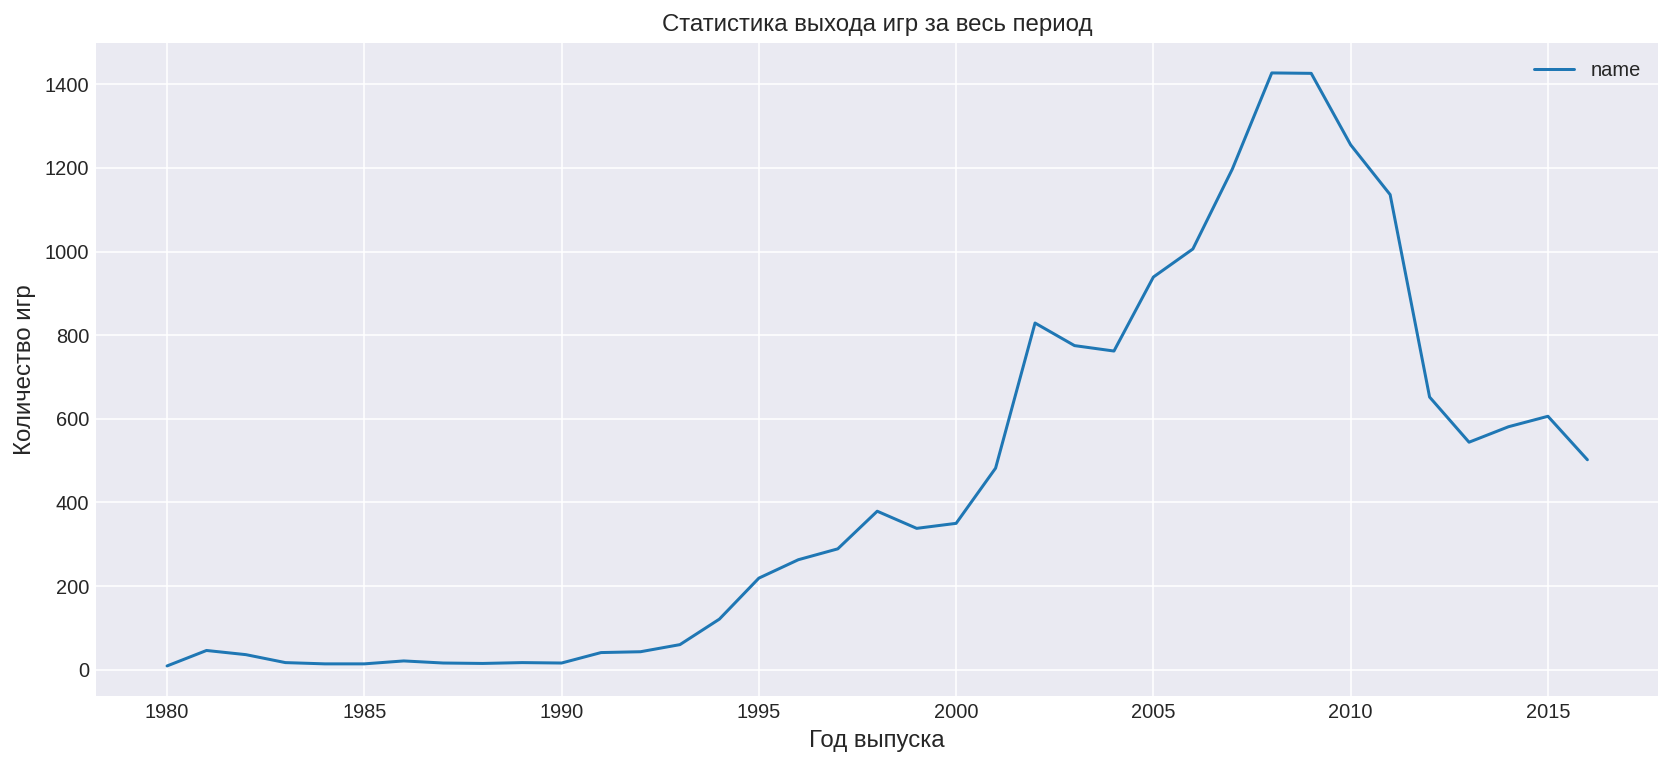

In [24]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(
    grid=True, title="Статистика выхода игр за весь период", figsize=(14, 6))
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество игр", fontsize=12)
plt.show()

Первый заметный рост начался с 1993 года, наибольшее число игр было выпущено в 2008-2009 годах, затем каждый год количество новых игр уменьшалось. Возможно это связано с тем, что разработчики стали уделять больше внимания и времени на проработку графики, сюжетов и персонажей, игры стали выпускаться более масштабные и качественные. 

Построим график и посмотрим на суммарные продажи по платформам:

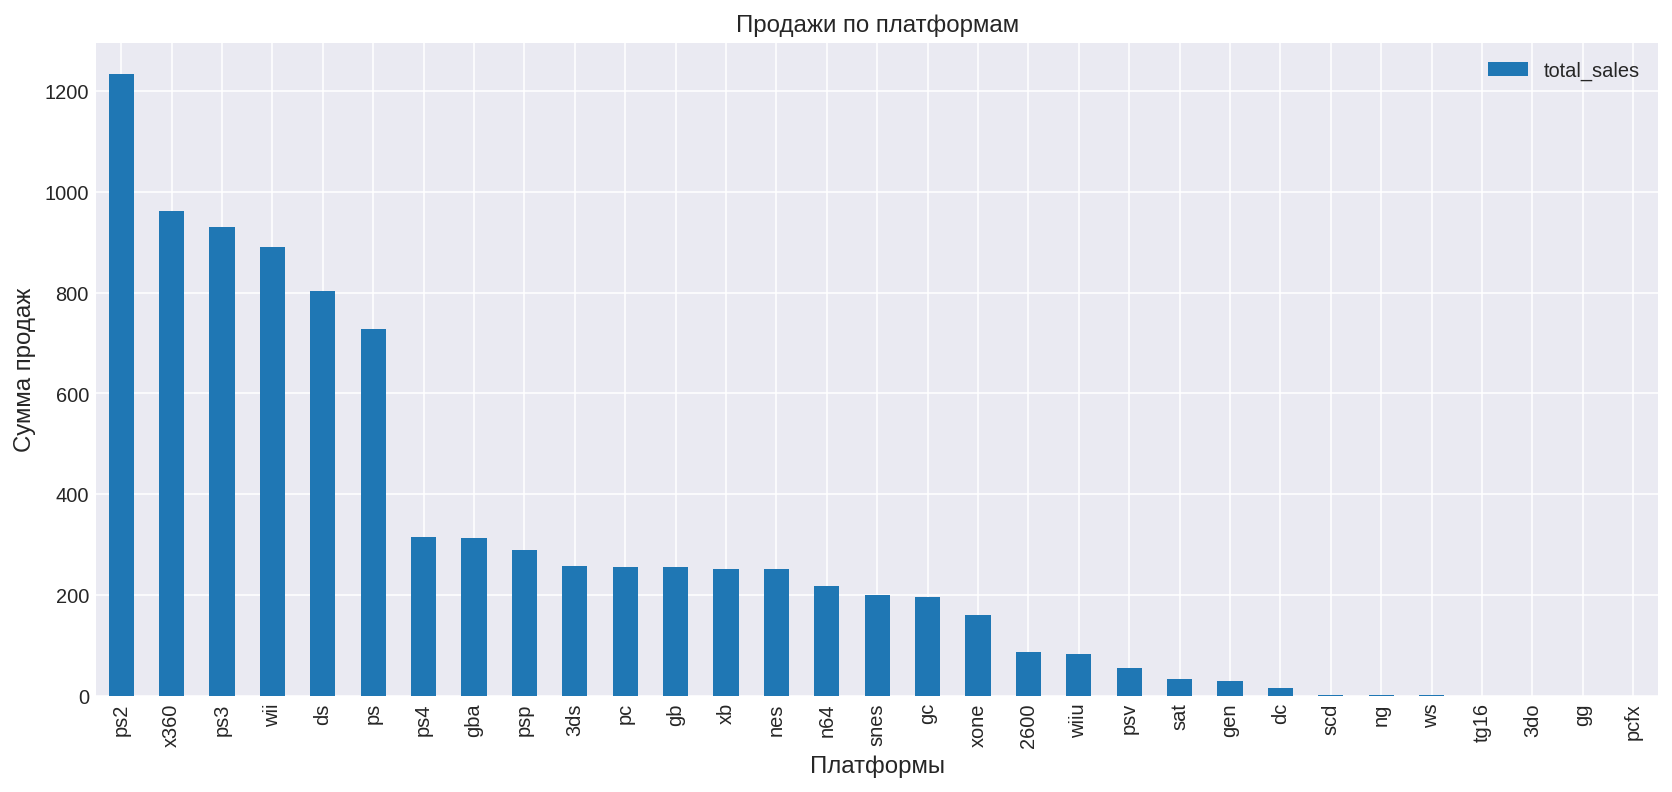

In [25]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', title='Продажи по платформам', grid=True, figsize=(14, 6))
plt.xlabel("Платформы", fontsize=12)
plt.ylabel("Сумма продаж", fontsize=12)
plt.show()

За весь период наибольшее количество продаж у платформ ps2, x360, ps3, wii, ds и ps.

Сгруппируем таблицу по годам и платформам и построим график по продолжительности жизни платформ:

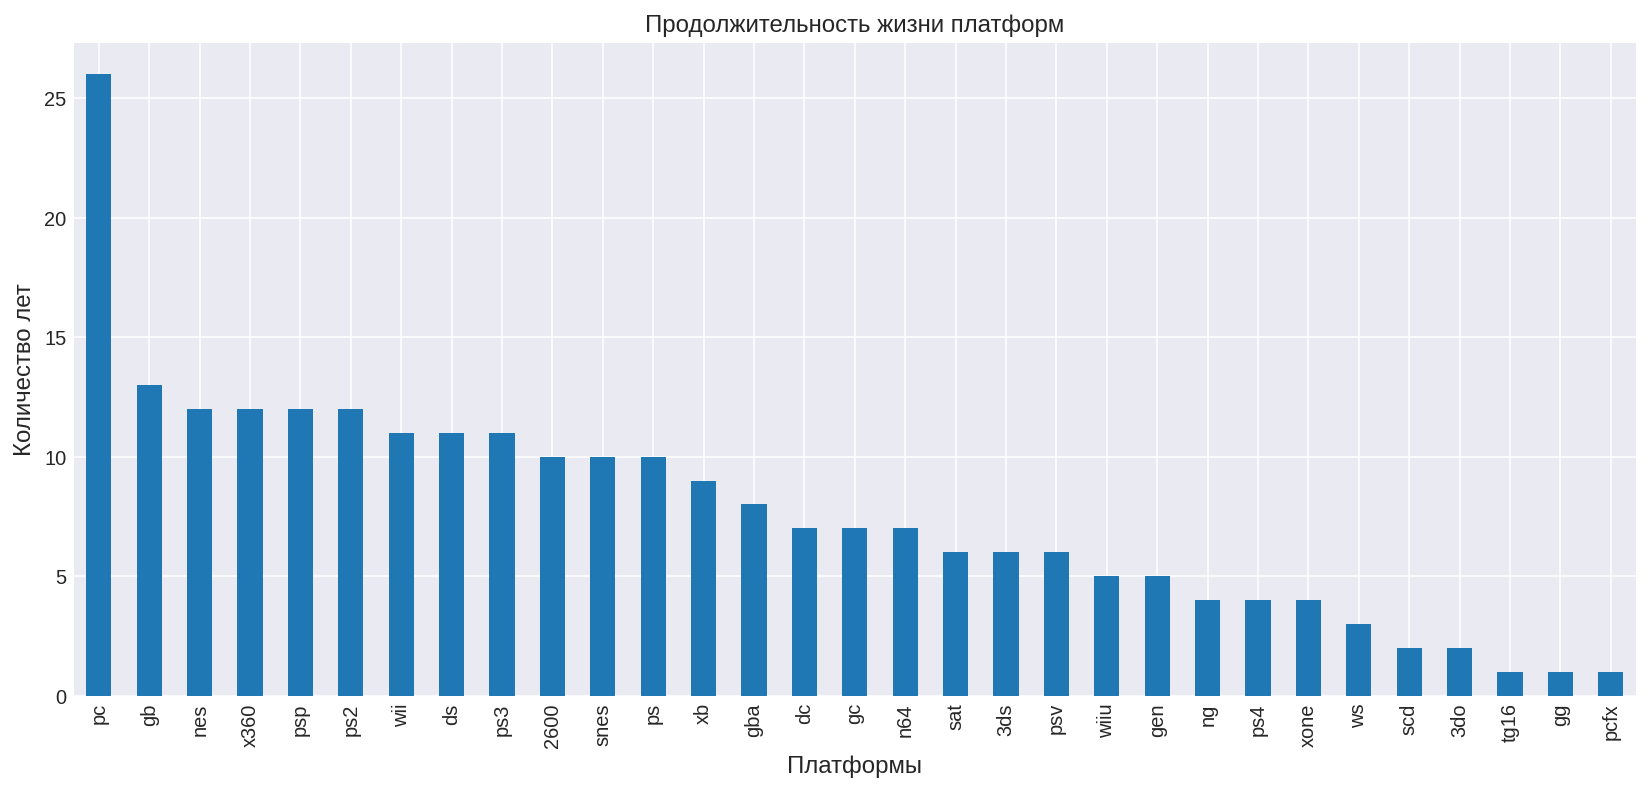

In [26]:
lifespan_platform = df.groupby(['year_of_release', 'platform']).count().reset_index().groupby(
    'platform')['year_of_release'].agg('count').sort_values(ascending=False)
lifespan_platform.plot(kind='bar', title='Продолжительность жизни платформ', grid=True, figsize=(14, 6))
plt.xlabel("Платформы", fontsize=12)
plt.ylabel("Количество лет", fontsize=12)
plt.show()

Игры к персональным компьютерам (pc) выпускаются уже 26 лет, но период сущестования других платформ варьируется от 1 до 13 лет. Учитывая предыдущий график, можно сказать, что несмотря на продолжительный срок жизни, pc не входит в число успешных платформ для игр.

Выделим самые популярные платформы в переменной 'top_platforms' и циклом выведем по ним графики с количеством проданных игр по годам:

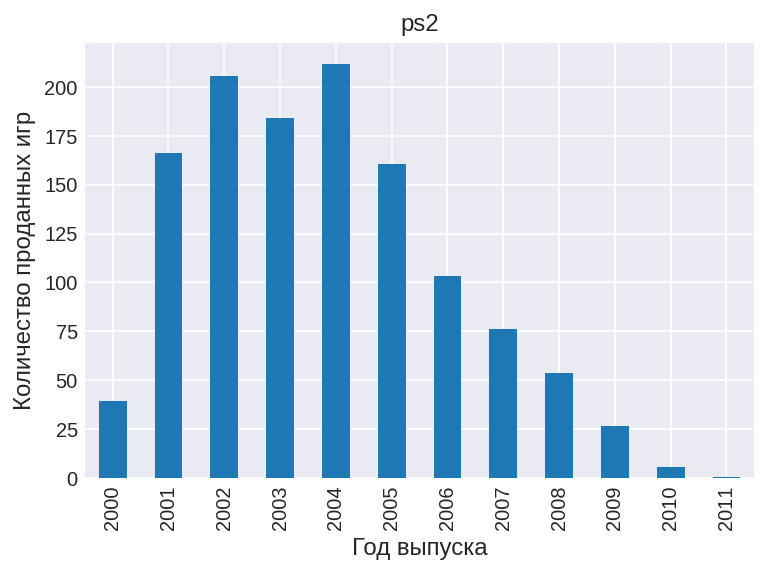

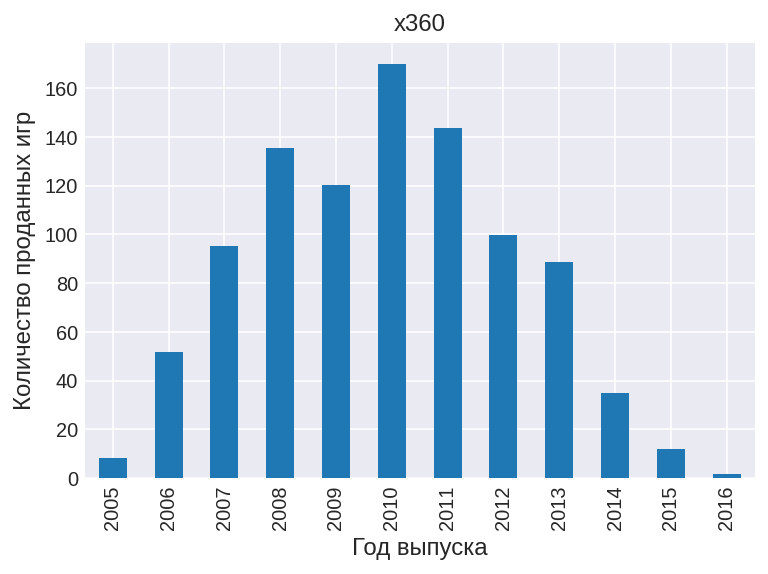

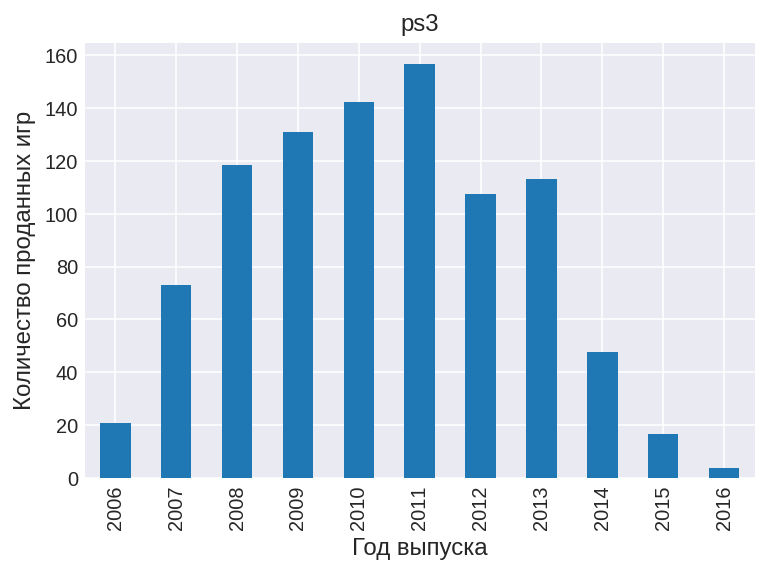

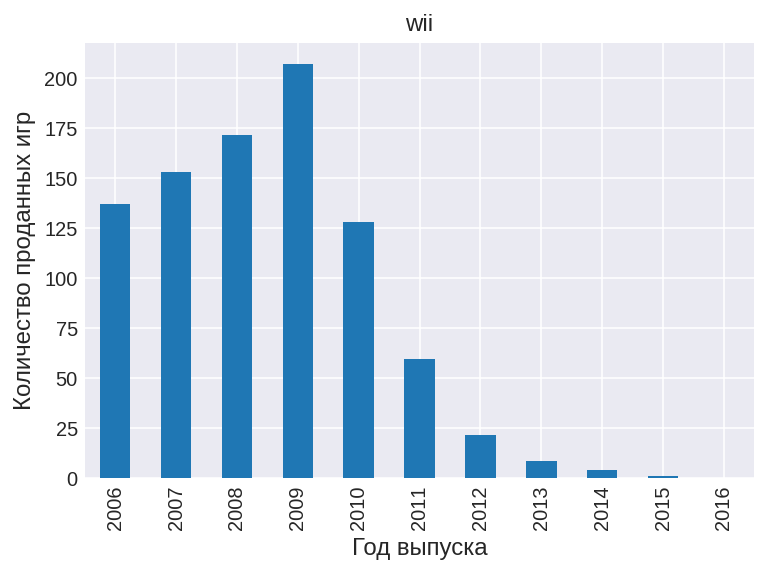

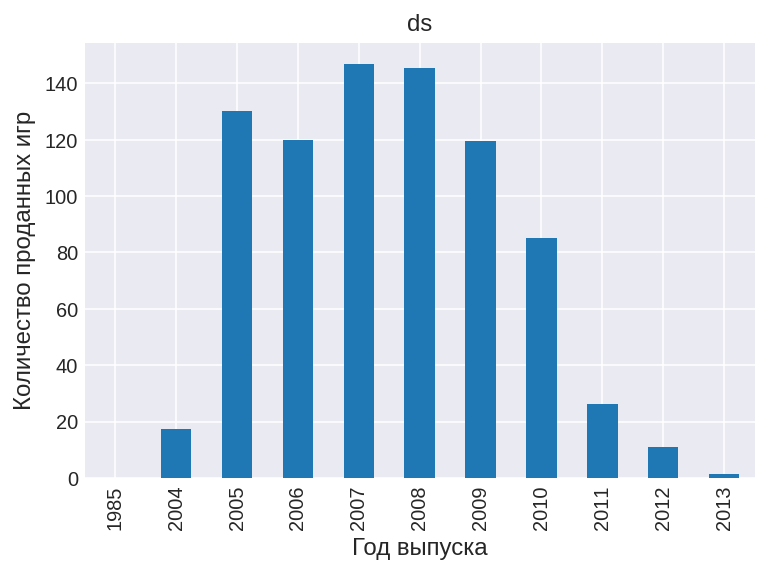

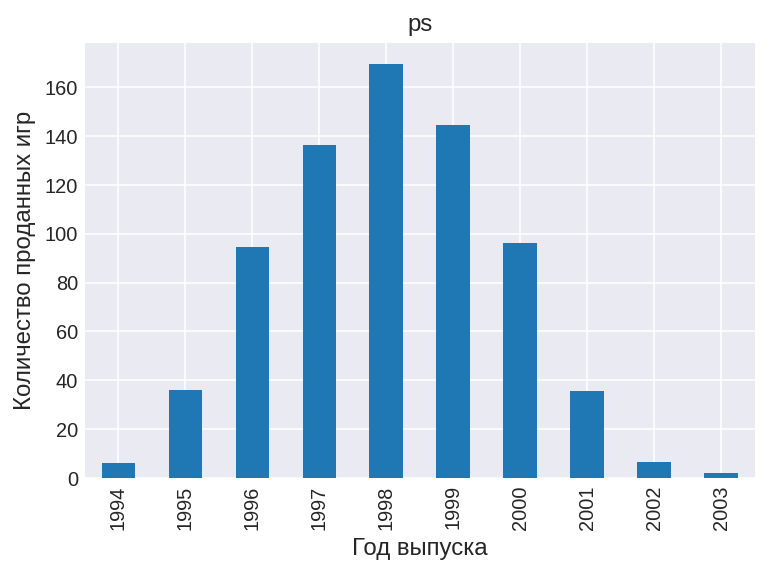

In [27]:
top_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    'total_sales', ascending=False).head(6).index.values

for platform in top_platforms:
    sales = df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    sales.plot(kind='bar', title=platform, grid=True)
    plt.xlabel("Год выпуска", fontsize=12)
    plt.ylabel("Количество проданных игр", fontsize=12)
    plt.show()

Платформы появлялись и исчезали из продаж за 10-11 лет, при этом уход с рынка занимал примерно пять лет.

Рассчитаем среднее значение продолжительности жизни, учитывая не только популярные платформы, при этом исключим выбросы, которыми будуем считать pc и платформы, которые либо только появились на рынке, либо были совсем неудачными и просуществовали не больше 3 лет:

In [28]:
lifespan_platform_slice = lifespan_platform.reset_index().query('3 < year_of_release <= 13')
print("Средний срок жизни платформ: ", round(lifespan_platform_slice['year_of_release'].mean(), 2))

Средний срок жизни платформ:  8.42


Выберем актуальный период для построения прогноза на 2017 год сроком 5 лет, так как за этот срок будет видно, растут или падают продажи. Сделаем срез данных и запишем в переменную 'df_actual':

In [29]:
df_actual = df.query('year_of_release > 2011')

Посмотрим размер таблицы:

In [30]:
df_actual.shape

(2885, 12)

В таблице осталось 2885 строк.

Выведем на графике платформы и посмотрим, какие из них лидируют за выбранный период:

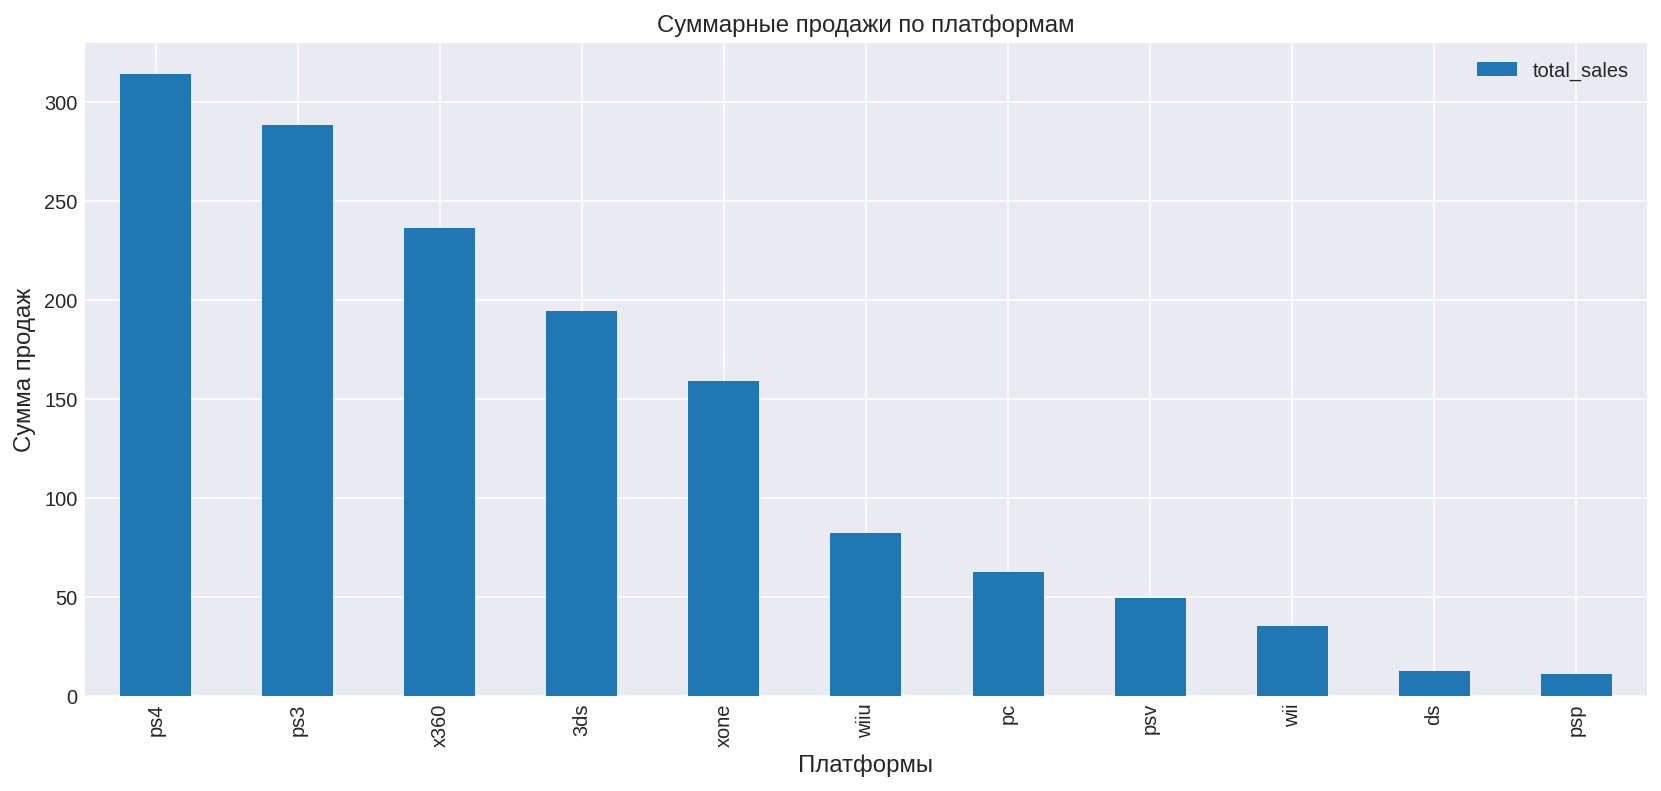

In [31]:
df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).plot(kind='bar', title='Cуммарные продажи по платформам', grid=True, figsize=(14, 6))
plt.xlabel("Платформы", fontsize=12)
plt.ylabel("Сумма продаж", fontsize=12)
plt.show()

 В данном периоде самыми продаваемыми топ-5 платформами являются  ps4, ps3, x360, 3ds и xone.

Посмотрим на продажи платформ по годам:

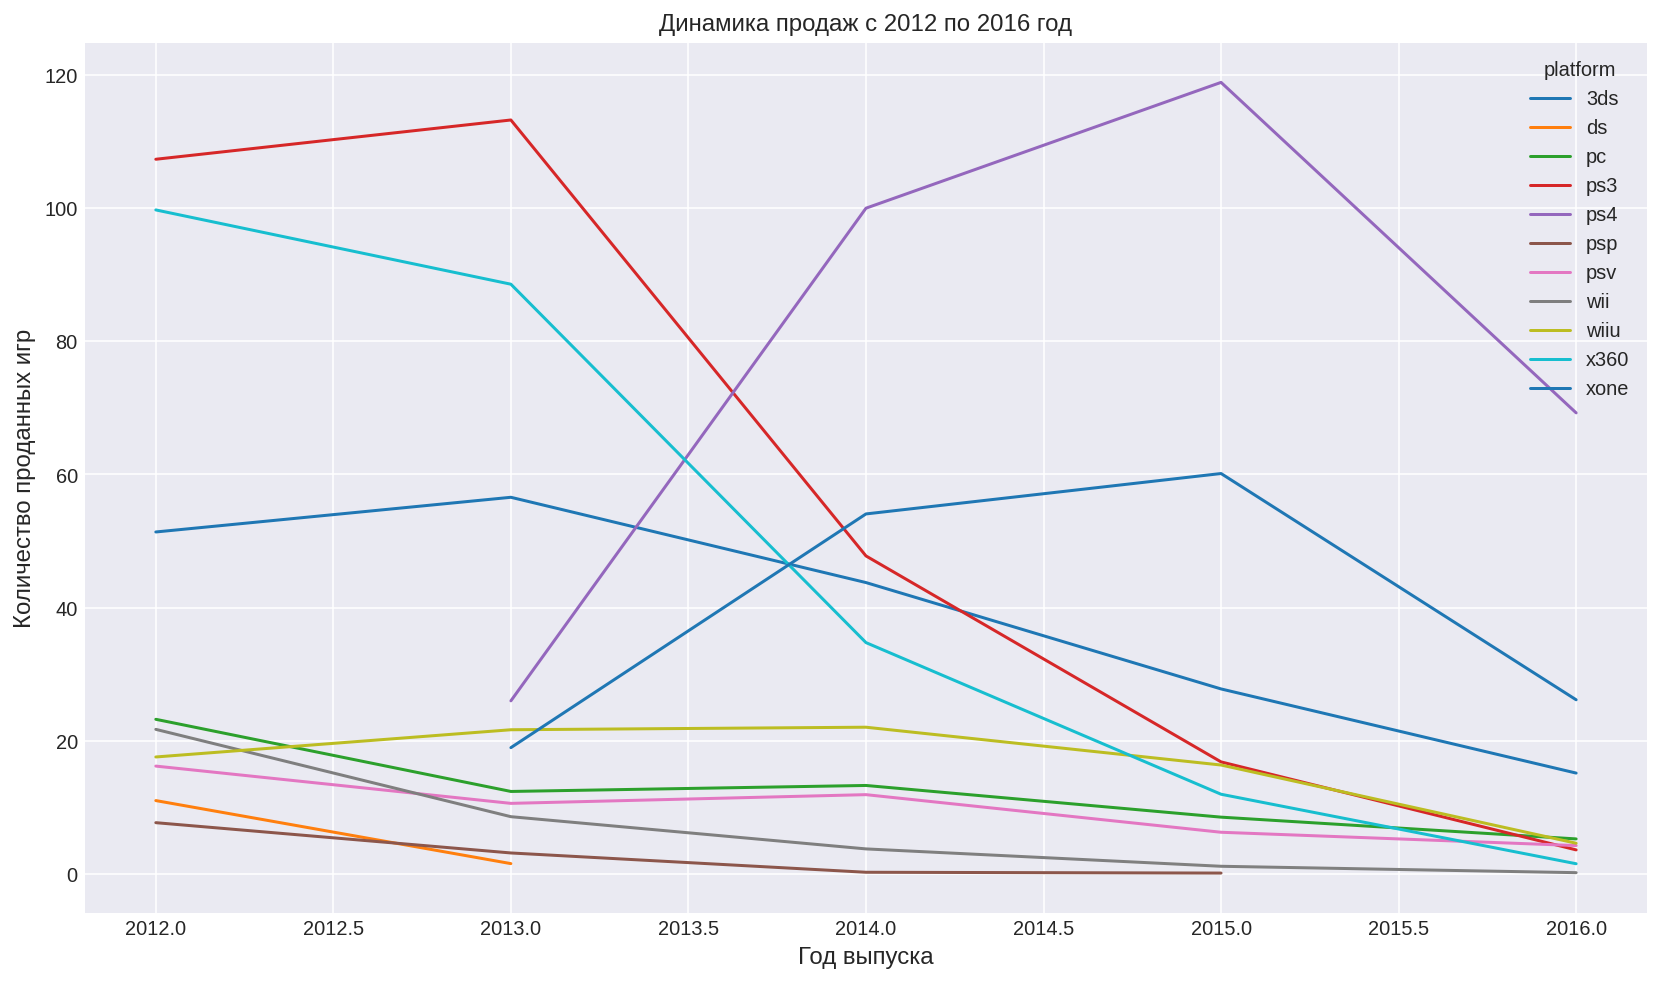

In [32]:
df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'
    ).plot(style='-', grid=True, figsize=(14,8), title = 'Динамика продаж c 2012 по 2016 год')
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество проданных игр", fontsize=12)
plt.show()

По всем платформам наблюдается падение в продажах. На графиках видно, что даже самые прибыльные ps3, x360, wii уходят с рынка. Можно выделить две платформы ps4 и xone, которые появились только в 2013 году и могут быть потенциально прибыльными, но при этом xone имеет в два раза меньше продаж.

Выведем сводную таблицу с количеством проданных игр для данных платформ:

In [33]:
df_actual.query('platform == "ps4" or platform == "xone"').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,ps4,xone
year_of_release,,
2013,25.99,18.96
2014,100.00,54.07
2015,118.90,60.14
2016,69.25,26.15


Построим boxplot c продажами игр по платформам и посмотрим к каким платформам относятся самые продаваемые игры:

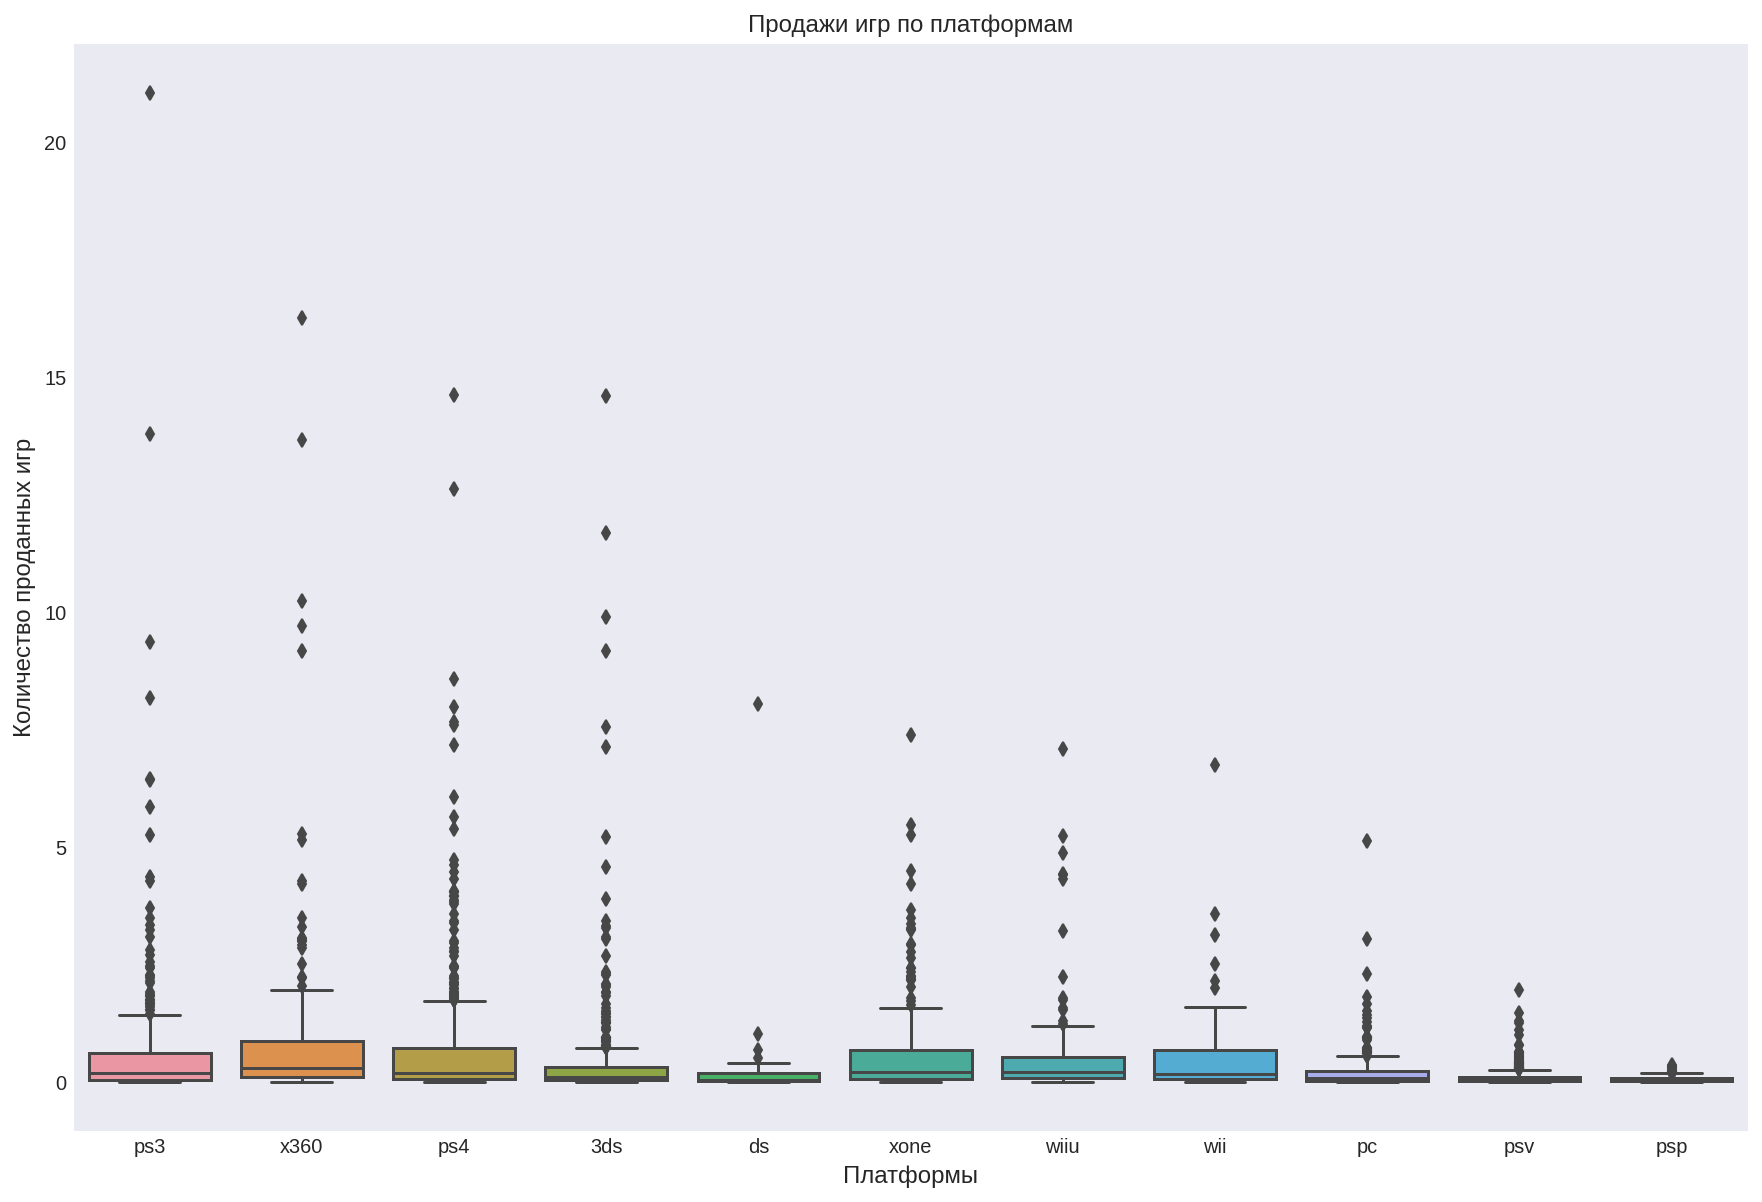

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(x="platform", y="total_sales", data = df_actual)
plt.title('Продажи игр по платформам')
plt.xlabel("Платформы", fontsize=12)
plt.ylabel("Количество проданных игр", fontsize=12)
plt.show()

Наибольшее количество продаж по игре у платформы ps3, которое составило 21 миллион копий. Для x360 максимум по продажам 16 миллионов копий, а для ps4 и 3ds около 15 миллионов. Самое низкое количество проданных игр относится к платформам psv и psp. Разница между платформами может формироваться из-за количества эксклюзивных игр для определенной платформы, технических характеристик конкурирующих платформах (применимо для платформ одного форм-фактора) и отзывов.

<a name="3.2"><h3>3.2 Оценка влияния отзывов и жанров на продажи</h3></a>

Напишем функцию для вывода графиков и расчета корреляции для оценки влияния отзывов пользователей и критиков на продажи:

In [35]:
def plot_corr(table):
    figure, ax = plt.subplots(1,2,figsize=(16,5))

    table.plot(x='critic_score', y='total_sales', grid=True, kind='scatter', alpha=0.3, ax=ax[0])
    ax[0].set_title('Влияние оценок критиков')
    ax[0].set_xlabel('Оценки критиков')
    ax[0].set_ylabel('Количество продаж')

    table.plot(x='user_score', y='total_sales', grid=True, kind='scatter', alpha=0.3, ax=ax[1])
    ax[1].set_title('Влияние оценок пользователей')
    ax[1].set_xlabel('Оценки пользователей')
    ax[1].set_ylabel('Количество продаж')                

    plt.show()

    print('Корреляция между продажами и оценками критиков: ', table['critic_score'].corr(table['total_sales']))
    print('Корреляция между продажами и оценками пользователей: ', table['user_score'].corr(table['total_sales']))    

Вызовем функцию plot_corr и посмотрим на зависимость отзывов и продаж популярной за последние пять лет платформы ps4:

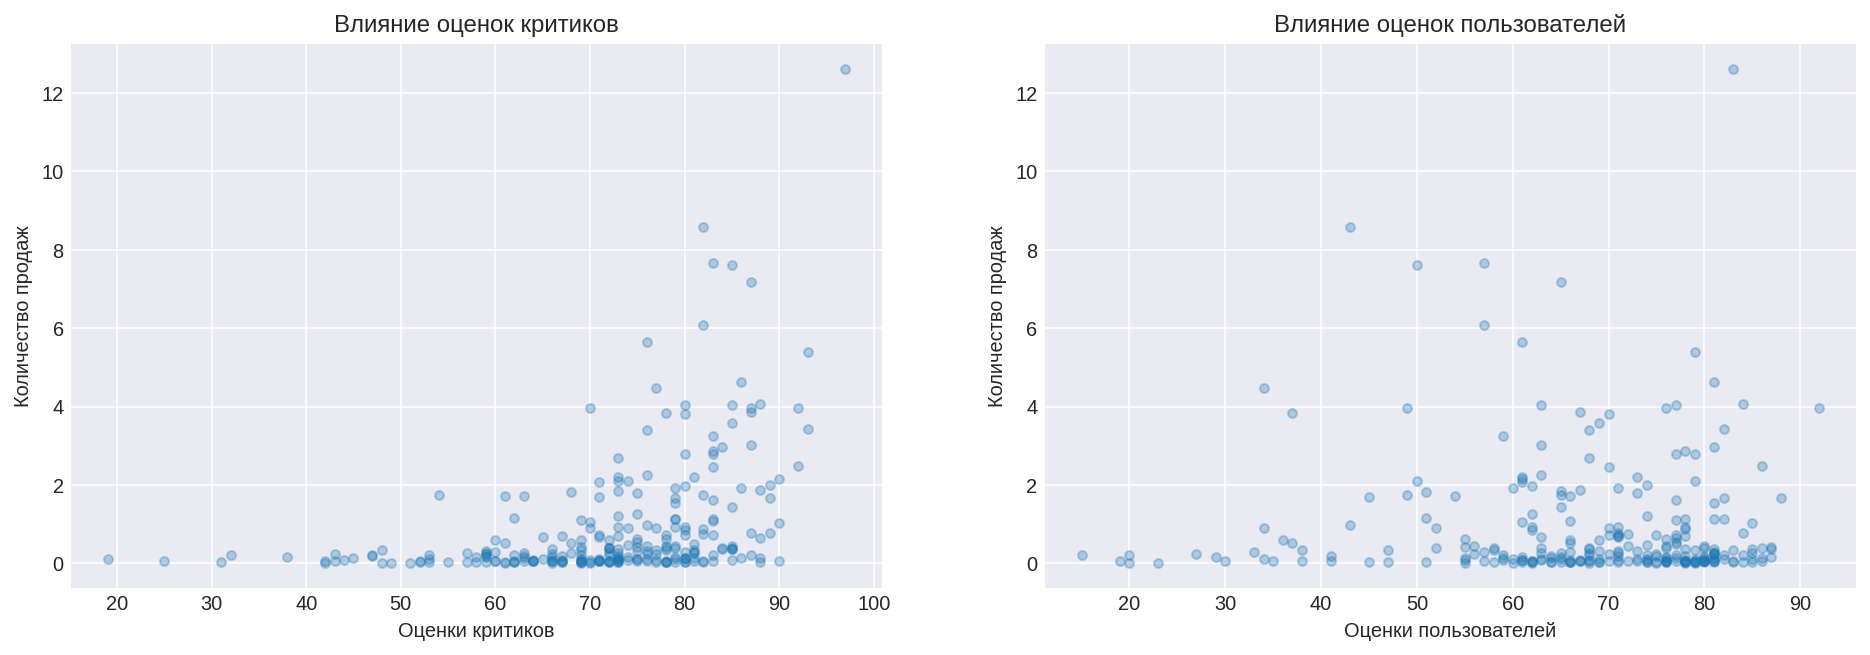

Корреляция между продажами и оценками критиков:  0.40656790206178095
Корреляция между продажами и оценками пользователей:  -0.031957110204556445


In [36]:
platform_ps4 = df_actual.query('platform=="ps4"')
plot_corr(platform_ps4)

На графиках видно, что оценки критиков оказали небольшое влияние на продажи ps4, корреляция составила 0,4, в то время как отзывы пользователей не повлияли на объемы продаж.

Посмотрим на влияние отзывов пользователей и критиков на продажи по всем платформам:

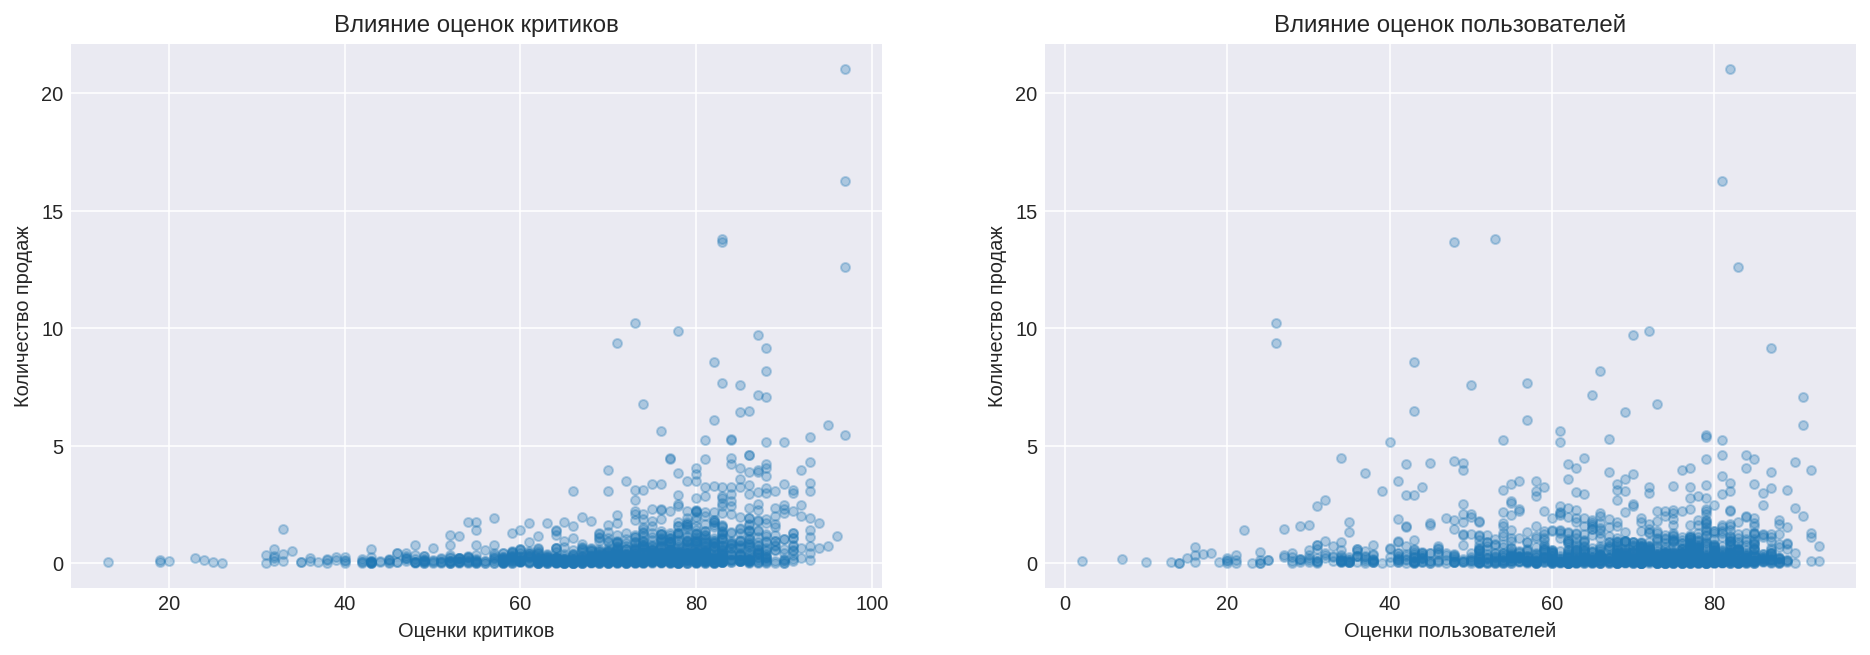

Корреляция между продажами и оценками критиков:  0.30863336128976077
Корреляция между продажами и оценками пользователей:  0.004194481106917186


In [37]:
plot_corr(df_actual)

По графикам и оценке корреляции можно сделать выводы, что отзывы критиков оказывают слабое влияние на продажи, а отзывы пользователей не имеют связи с количеством проданных игр.


Посмотрим на распределение игр по жанрам:

In [38]:
genre_group = df_actual.groupby('genre')[['name', 'total_sales']].agg({'name':['count'],'total_sales':['sum']})
genre_group.columns = ['count', 'total_sales']
genre_group.sort_values(by='total_sales', ascending=False)

,count,total_sales
genre,,
action,1031,441.12
shooter,235,304.73
role-playing,370,192.80
sports,267,181.06
misc,192,85.04
platform,85,61.00
racing,115,53.50
fighting,109,44.49
simulation,80,35.12


Самое большое количество игр в жанре action, по количеству проданных игр этот жанр тоже занимает первое место. Также большое количество продаж у жанра shooter, при том что таких игр в пять раз меньше, чем в action. Далее по количеству продаж можно выделить role-playing и sports. Самые низкие продажи в жанре puzzle.

<div style="border: solid green 2px; padding: 20px">

**Выводы**

* Рассмотрели динамику продаж игр и платформ в разные годы и определили актуальный период сроком пять лет для построения прогнозов на 2017 год.
* Самые продаваемые платформы в актуальном периоде ps4, ps3, x360, 3ds и xone, при этом наиболее потенциально прибыльной является ps4.
* Отзывы критиков имеют большее влияние на продажи, чем отзывы пользователей.
* Жанры оказывают влияние на продажи, при этом самые прибыльные игры в жанре action.</div>

<a name="4"><h2>4 Оценка данных по регионам</h2></a>



<a name="4.1"><h3>4.1 Топ-5 популярных платформ</h3></a>

Напишем функцию, которая группирует по платформам, рассчитывает долю продаж и выбирает топ-5 платформ для построения гистограммы с наиболее популярными платформами в регионе:

In [39]:
def platform_plot(column, number, name):
    sales_platform = df_actual.groupby('platform')[column].agg('sum').reset_index().sort_values(by=column, ascending=False)
    sales_platform['percent'] = round(sales_platform[column]/sales_platform[column].sum() * 100)
    sales_platform = sales_platform.sort_values(by=column, ascending=False).reset_index(drop=True).head()
    sales_platform.plot(y='percent', x='platform', kind='bar', rot=0, grid=True, ax=ax[number])
    ax[number].set_xlabel("Платформы", fontsize=12)
    ax[number].set_ylabel("Проценты", fontsize=12)
    ax[number].set_title(name, fontsize=14)

Вызовем функцию platform_plot и посмотрим на различия в долях продаж в Северной Америке (NA), Европе (EU) и Японии (JP) :

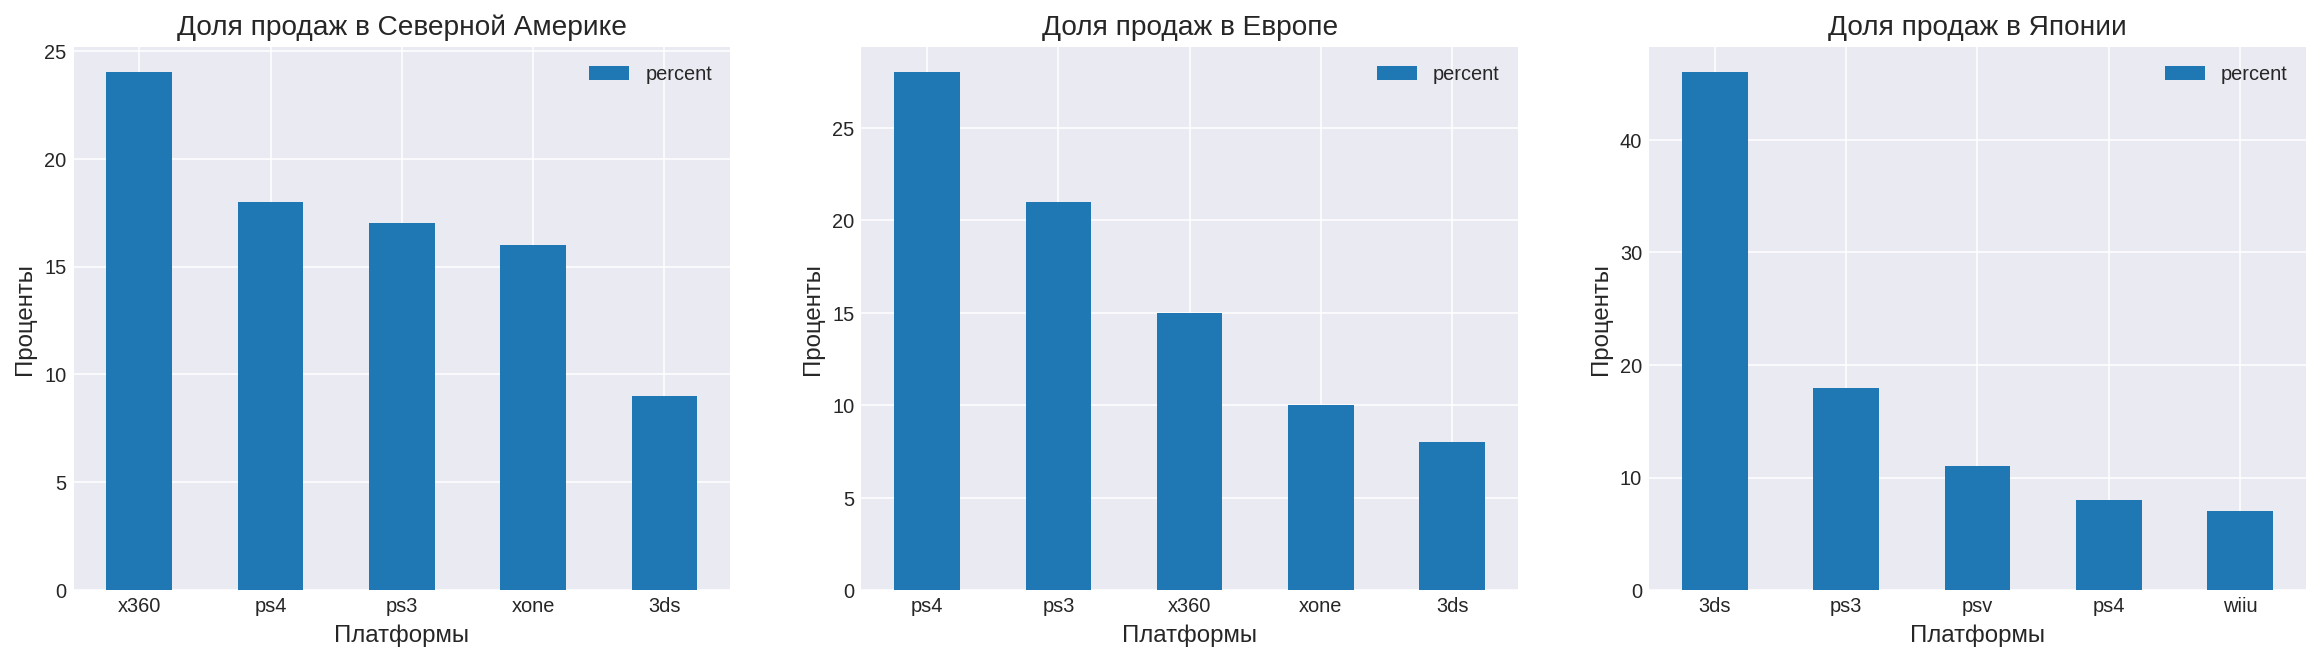

In [40]:
figure, ax = plt.subplots(1,3,figsize=(20,5))

platform_plot('na_sales', 0, "Доля продаж в Северной Америке")
platform_plot('eu_sales', 1, "Доля продаж в Европе")
platform_plot('jp_sales', 2, "Доля продаж в Японии")

plt.show()

На графиках видно, что есть различия по рынкам продаж для каждого региона, особенно сильно отличаются предпочтения пользователей в Японии. Так, например, 3ds, которая занимает 5 место в Северной Америке и Европе, лидирует в Японии и составляет 46% от общих продаж. В Северной Америке самой продаваемой платформой является x360, в Европе чаще покупают ps4, а x360 здесь занимает 3 место. В Японии платформа x360 не входит в пятёрку лидеров. Можно сделать вывод, что предпочтения пользователей в Северной Америке и Европе более похожи, топ-5 совпадают, только первые три платформы занимают разные места внутри группы.

<a name="4.2"><h3>4.2 Топ-5 популярных жанров</h3></a>

Создадим функцию, которая выделяет популярные жанры и строит гистограмму:

In [41]:
def genre_plot(column, number, name):
    df_actual.pivot_table(index='genre', values=column, aggfunc='sum').sort_values(
      by=column, ascending=False
      ).head().plot(
          kind='bar', grid=True, rot=0, ax=ax[number])
    ax[number].set_xlabel("Жанры", fontsize=12)
    ax[number].set_ylabel("Количество проданных игр", fontsize=12)
    ax[number].set_title(name, fontsize=14)

Рассмотрим самые популярные жанры по регионам:

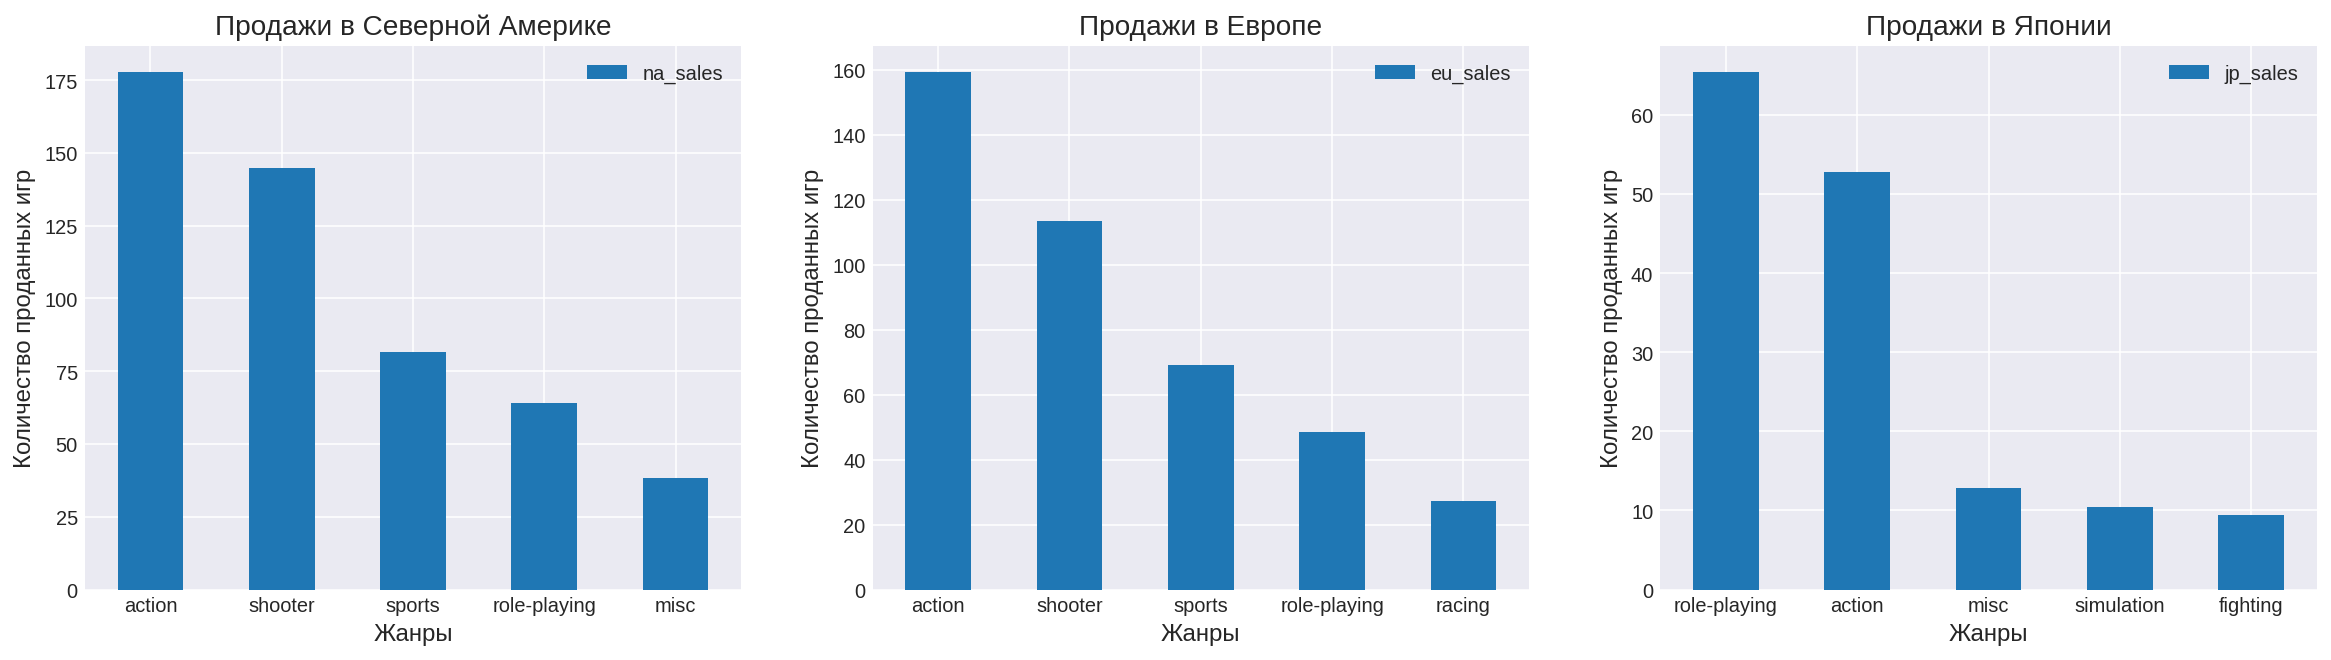

In [42]:
figure, ax = plt.subplots(1,3,figsize=(20,5))

genre_plot('na_sales', 0, "Продажи в Северной Америкe")
genre_plot('eu_sales', 1, "Продажи в Европе")
genre_plot('jp_sales', 2, "Продажи в Японии")

plt.show()

По жанрам можно сказать, что препочтения пользователей в Северной Америке и Европе очень похожи, отличается только пятное место, для Америки это music, а для Европы racing.
Жанр action популярен во всех регионах, в Северной Америке и Европе он занимает первое место, а в Японии второе, первое место по количеству продаж здесь занимает жанр role-playing, который не вошел в топ-5 для Северной Америки и Европы. 

<a name="4.3"><h3>4.3 Влияние рейтинга ESRB на продажи по регионам</h3></a>

Напишем функцию, которая строит график с продажами игр в зависимости от рейтинга:

In [43]:
def rating_plot(column, number, name):
    df_actual.pivot_table(index='rating', values=column, aggfunc='sum').sort_values(
      by=column, ascending=False
      ).plot(
          kind='bar', grid=True, rot=0, ax=ax[number])
    ax[number].set_xlabel("Рейтинг игр", fontsize=12)
    ax[number].set_ylabel("Количество проданных игр", fontsize=12)
    ax[number].set_title(name, fontsize=14)

Обратимся к функции rating_plot и выведем графики с данными по регионам:

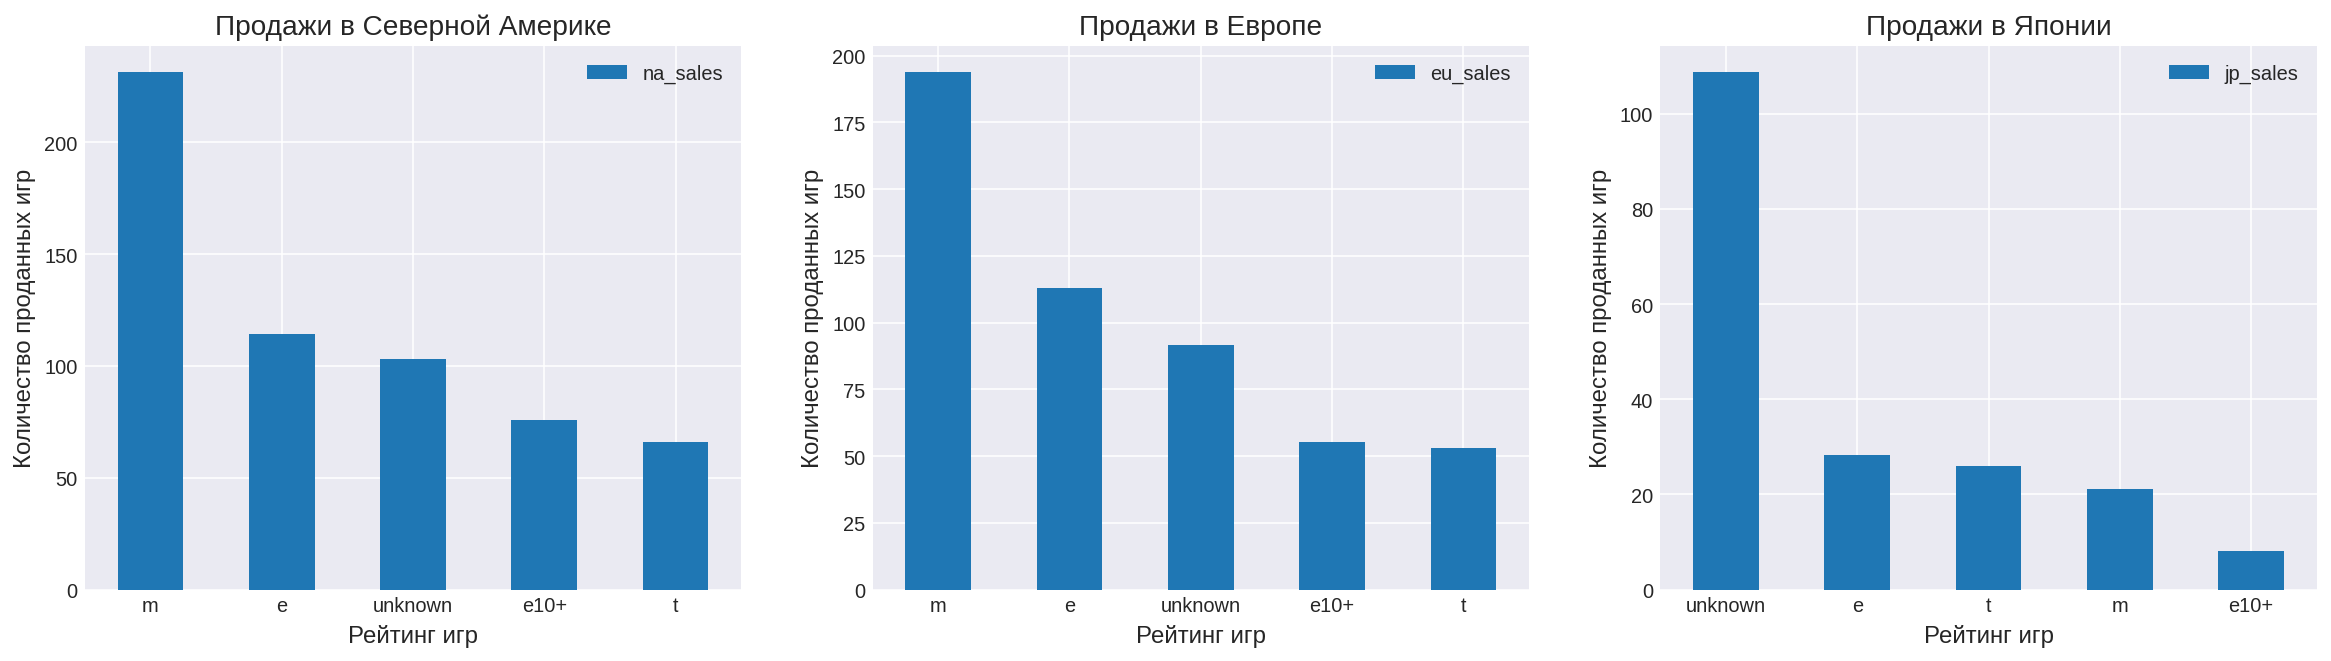

In [44]:
figure, ax = plt.subplots(1,3,figsize=(20,5))

rating_plot('na_sales', 0, "Продажи в Северной Америкe")
rating_plot('eu_sales', 1, "Продажи в Европе")
rating_plot('jp_sales', 2, "Продажи в Японии")

plt.show()

В Северной Америке и Европе рейтинг одинаково влияет на продажи, больше всего проданных игр с рейтингом 'm' (категория для взрослых) и меньше всего с рейтингом 't' (для подростков). В Японии на первом месте по продажам игры, для которых нет информации о рейтинге. На втором месте игры с рейтингом 'e' (возрастная категория от 6 лет) и это характерно для всех регионов. Данные могут быть неточными, так как содержится много записей с неизвестным рейтингом.

<div style="border: solid green 2px; padding: 20px">

**Выводы**

* Популярность платформ в зависимости от регионов разная, так в Северной Америке лидирует платформа x360, в Европе ps4, а в Японии 3ds.
* В Северной Америке и Европе наиболее популярный жанр action, в Японии на первом месте жанр role-playing.
* Рейтинг ESRB влияет на продажи, при этом в Северной Америке и Европе данные в зависимости от рейтинга совпадают, а для Японии нельзя точно определить рейтинг у самых продаваемых игр из-за отсутствия информации. Скорее всего это игры, созданные японскими производителями и ориентированные в основном для продажи в своём регионе, которые имеют свою оценочную систему, поэтому такие рейтинги не были указаны в данном источнике данных.
</div>

<a name="5"><h2>5 Проверка гипотез</h2></a>

<a name="5.1"><h3>5.1 Сравнение средних пользовательских рейтингов платформ Xbox One и PC</h3></a>

Сформулируем нулевую и альтернативную гипотезу:

* H₀: средние пользовательские рейтинги платформы Xbox One (xone) равны рейтингу PC.
* H₁: средние пользовательские рейтинги платформы Xbox One различаются с рейтингом PC.

Для проверки равенства средних двух независимых совокупностей воспользуемся методом scipy.stats.ttest_ind(). Так как далее в работе будет проверяться гипотеза о равенстве средних рейтингов жанров action и sports, для которой также подходит этот метод, то запишем функцию:

In [45]:
def hypotheses_test(sample_1,sample_2, equal_bool):
    alpha = .05
    results = st.ttest_ind(sample_1, sample_2, equal_var = equal_bool)    
    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")    

Перед проверкой гипотезы посмотрим размах выборки и дисперсию:

In [46]:
rating_xone_pc = df_actual.query('platform == "xone" or platform == "pc"').groupby('platform')['user_score'].agg(
    ['count', lambda x: round(np.var(x, ddof=1),2)])
rating_xone_pc.columns = ['count', 'variance']
rating_xone_pc

,count,variance
platform,,
pc,206,277.04
xone,182,190.70


Так как выборки разного размера и дисперсии не равны, то в методе укажем equal_var = False.

Выделим две выборки для платформ xone и pc и обратимся к функции hypotheses_test для проверки гипотез:

In [47]:
platform_xone = df_actual.query('platform == "xone" and user_score > 0')['user_score']
platform_pc = df_actual.query('platform == "pc" and user_score > 0')['user_score']
hypotheses_test(platform_xone, platform_pc, False)

p-значение: 0.5489537965135056
Не получилось отвергнуть нулевую гипотезу


<div style="border: solid green 2px; padding: 20px">
    
**Вывод**

Значение p-value 55%, поэтому нельзя отклонить нулевую гипотезу о том, что средние пользовательские рейтинги Xbox Onbe и PC равны.</div>

<a name="5.2"><h3>5.2 Сравнение средних пользовательских рейтингов жанров action и sports</h3></a>

Сформулируем нулевую и альтернативную гипотезу:
*   H₀: средние пользовательские рейтинги жанра action равны рейтингам  жанра sports
*   H₁: средние пользовательские рейтинги жанра action различаются с рейтингом  жанра sports

Проверим размеры выборок и дисперсии:

In [48]:
genre_xone_pc = df_actual.query('genre == "action" or genre == "sports"').groupby('genre')['user_score'].agg(
    ['count', lambda x: round(np.var(x, ddof=1),2)])
genre_xone_pc.columns = ['count', 'variance']
genre_xone_pc

,count,variance
genre,,
action,523,188.91
sports,194,303.85


Выборки разного размера и дисперсии не равны. Проверим гипотезы с помощью функции hypotheses_test:

In [49]:
genre_action = df_actual.query('genre == "action" and user_score > 0')['user_score']
genre_sports = df_actual.query('genre == "sports" and user_score > 0')['user_score']
hypotheses_test(genre_action, genre_sports, False)

p-значение: 5.989458066467202e-20
Отвергаем нулевую гипотезу


<div style="border: solid green 2px; padding: 20px">
    
**Вывод**

Вероятность получить среднее значение рейтинга жанра action, равного рейтингу sports очень низка и практически равна нулю, значение p-value 0.000000000000000005, поэтому отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров action и sports равны.</div>

<a name="6"><h2>6 Общие выводы</h2></a>

В результате работы рассмотрели данные о проданных компьютерных играх и выделили факторы, которые могут оказывать влияние на продажи.

Так, определили, что рынок по продажам платформ падает и только две из них можно рассматривать как потенциально прибыльные. Наиболее прибыльной платформой является ps4, её продажи составили в 2016 году 69 миллионов копий. У второй по популярности xone продажи существенно ниже и составляют 26 миллионов копий, при этом у обоих платформ в 2015 году объем продаж был в два раза выше.

Следует учитывать регион продаж, так как оценка данных показала,  что популярность платформ и жанров в регионах различается, особенно сильно отличаются предпочтения пользователей Японии:
* В Северной Америке самыми продаваемыми платформами являются x360, ps4, ps3, xone и 3ds, в Европе в топ-5 тоже входят эти платформы, но на первом месте по продажам ps4, затем идут ps3 и x360, а 4 и 5 места совпадают. 
В Японии самая популярная платформа 3ds, также в топ-5 входят ps3, psv, ps4 и wiiu.
* Пользователи Северной Америки и Европы предпочитают жанры action, shooter, sport и role-playing. На пятом месте по популярности в Северной Америке жанр music, а в Европе racing. В Японии лидируют жанры role-playing, action, misc, simulation и fighting.
* В Северной Америке и Европе по возрастному рейтингу наиболее продаваемые игры с рейтингом 'm' и наименее популярные с рейтингом 't'. Для Японии нельзя установить какие по возрастному рейтингу игры более популярны из-за недостаточности данных.

Также в работе проверили две гипотезы и установили, что:

* средние пользовательские рейтинги платформы Xbox One равны рейтингу PC;
* средние пользовательские рейтинги жанра action различаются с рейтингом жанра sports.